<a href="https://colab.research.google.com/github/Hanifka/Kaggle/blob/main/titanic_machine_learning_from_disaster_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive

drive.mount('/content/drive')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive


In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
training = pd.read_csv('/content/drive/MyDrive/Dataset/kaggle/train (5).csv',index_col="PassengerId")




In [5]:
training.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Drop Useless Columns

kategorikan age(approved)

In [7]:
training = training.drop(columns=['Ticket','Cabin'])
#Drop Ticket sama cabin

In [8]:
#Fungsi Untuk detect Null Values
total = training.isnull().sum().sort_values(ascending=False)
percent = (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age,177,0.198653
Embarked,2,0.002245
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000


# Feature Engineering

**Kolom Age**

In [9]:

AGE=training['Age']
AGE = AGE.dropna()

AGE = AGE.astype('float')

mean_value=AGE.mean()
training['Age'].fillna(value=mean_value, inplace=True)

training["Age"] = pd.cut(training["Age"],[0, 5, 12, 18, 45, 120], labels = ["balita","anak-anak","remaja","dewasa","lansia"])


**Kolom Name Tranformation To Title**


ICA

In [10]:
training.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,dewasa,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,dewasa,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,dewasa,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,dewasa,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,dewasa,0,0,8.0500,S


In [11]:
training["title"]=training.Name.apply(lambda x: (x.split(", ")[1]).split(".")[0])

training.drop(columns="Name", inplace=True)


In [12]:
common=['Mr', 'Mrs', 'Miss', 'Master']
training.loc[~training["title"].isin(common), "title"] = "Others"

In [13]:
training["title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: title, dtype: int64

**Kolom Embarked**

In [14]:
training["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
training["Embarked"].value_counts()
training['Embarked'].fillna('S', inplace=True)

In [16]:
#Fungsi Untuk detect Null Values
total = training.isnull().sum().sort_values(ascending=False)
percent = (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
title,0,0.0


# Data Preprocessing

FERDA

In [17]:
X = training.drop(columns=['Survived'])
y = training['Survived']


In [18]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder

In [19]:
X = pd.get_dummies(X,columns=['Age', 'Embarked', 'title', 'Pclass'])

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            891 non-null    object 
 1   SibSp          891 non-null    int64  
 2   Parch          891 non-null    int64  
 3   Fare           891 non-null    float64
 4   Age_balita     891 non-null    uint8  
 5   Age_anak-anak  891 non-null    uint8  
 6   Age_remaja     891 non-null    uint8  
 7   Age_dewasa     891 non-null    uint8  
 8   Age_lansia     891 non-null    uint8  
 9   Embarked_C     891 non-null    uint8  
 10  Embarked_Q     891 non-null    uint8  
 11  Embarked_S     891 non-null    uint8  
 12  title_Master   891 non-null    uint8  
 13  title_Miss     891 non-null    uint8  
 14  title_Mr       891 non-null    uint8  
 15  title_Mrs      891 non-null    uint8  
 16  title_Others   891 non-null    uint8  
 17  Pclass_1       891 non-null    uint8  
 18  Pclass_2  

In [21]:
X["Sex"] = X["Sex"].astype("category")
X["Sex"] = X["Sex"].cat.codes


In [22]:
from sklearn.preprocessing import minmax_scale
X['Fare'] = minmax_scale(X['Fare'])

In [23]:
X.head()


,Sex,SibSp,Parch,Fare,Age_balita,Age_anak-anak,Age_remaja,Age_dewasa,Age_lansia,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Others,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0.014151,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0.139136,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0.015469,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,0,1,0,0.103644,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
5,1,0,0,0.015713,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


# **Model**

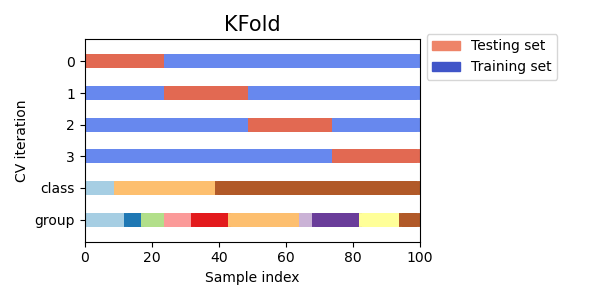

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn,X,y,cv=5)

array([0.81005587, 0.76404494, 0.86516854, 0.83146067, 0.81460674])

In [26]:
cross_val_score(knn,X,y,cv=5).mean()

0.8170673529596384

# ACCURACY SCORING

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 20), (179, 20), (712,), (179,))

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
knn.score(X_train,y_train),knn.score(X_test,y_test)

(0.8581460674157303, 0.7932960893854749)

In [30]:
y_predicted = knn.predict(X_test)

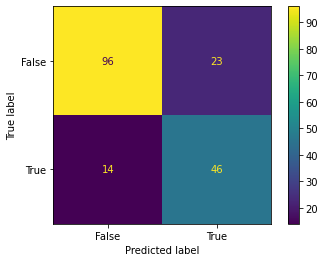

In [31]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_predicted,y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()